## **SIMPLE LINEAR REGRESSION**

In [44]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [45]:
# import dataset
data=pd.read_csv('/content/delivery_time.csv')
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [47]:
#checking for null values
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

<Axes: xlabel='Delivery Time', ylabel='Density'>

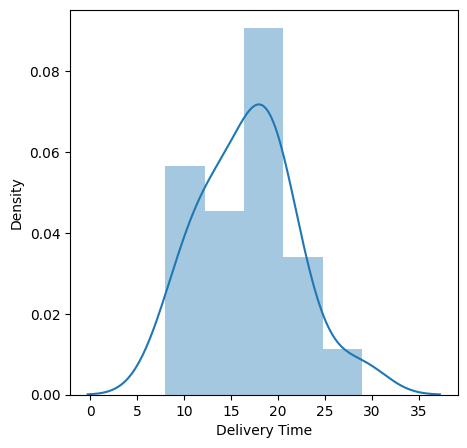

In [48]:
plt.figure(figsize=(5,5))
sns.distplot(data['Delivery Time'])

<Axes: xlabel='Sorting Time', ylabel='Density'>

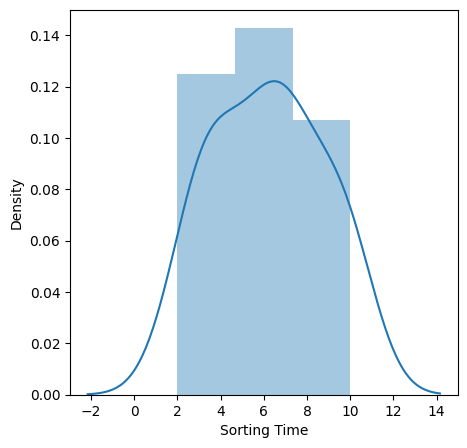

In [49]:
plt.figure(figsize=(5,5))
sns.distplot(data['Sorting Time'])

In [50]:
data=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data.head(10)

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


**Correlation**

In [51]:
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<Axes: xlabel='sorting_time', ylabel='delivery_time'>

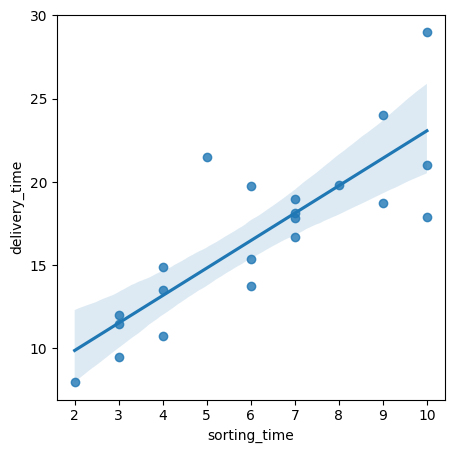

In [52]:
plt.figure(figsize=(5,5))
sns.regplot(x=data['sorting_time'],y=data['delivery_time'])

**Fitting linear regression model**

In [53]:
model=smf.ols("delivery_time~sorting_time",data=data).fit()

In [54]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 05 Jan 2024   Prob (F-statistic):           3.98e-06
Time:                        09:05:19   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [56]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [57]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

**predict for new data**

In [58]:
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [59]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [60]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64